In [2]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline
from multiprocessing import Process

video_scene = " -v WARNING --progress_bar None --disable_caching taylor_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s taylor_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


In [3]:
# n-te Ableitung des sinus an der Stelle a
def sine_derivative(a, n):
    factor = PI / 4
    if n % 4 == 0:
        return np.sin(a*factor)
    elif n % 4 == 1:
        return np.cos(a*factor)
    elif n % 4 == 2:
        return -np.sin(a*factor)
    elif n % 4 == 3:
        return -np.cos(a*factor)
    

def e_derivative(a, n):
    return np.exp(a) /100


# Taylor-Reihe einer Funktion func(a, n) im Punkt a mit Grad n
def Taylor(func_n, n, a):
    def Taylor_n(x):
        taylor_series = 0
        for i in range(n+1):
            taylor_series += func_n(a, i)/math.factorial(i)*(PI/4*(x-a))**i
        return taylor_series
    return Taylor_n


# Find x-limit for given y
def find_xlim_plus(func, y_limit, interval):
    func_down_limit = interval[0]
    func_up_limit = interval[1]
    x_array = np.linspace(func_down_limit, func_up_limit, 1000)
    x_down = interval[0]
    x_up = interval[1]
    for x in x_array:
        y = func(x)
        #print(y)
        if y <= -y_limit:
            x_down = x
        if y >= y_limit:
            x_up = x
            return [x_down, x_up]
    return [x_down, x_up]


def find_xlim_minus(func, y_limit, interval):
    func_down_limit = interval[0]
    func_up_limit = interval[1]
    x_array = np.linspace(func_down_limit, func_up_limit, 1000)
    x_down = interval[0]
    x_up = interval[1]
    for x in x_array:
        y = func(x)
        #print(y)
        if y >= y_limit:
            x_down = x
        if y <= -y_limit:
            x_up = x
            return [x_down, x_up]
    return [x_down, x_up]

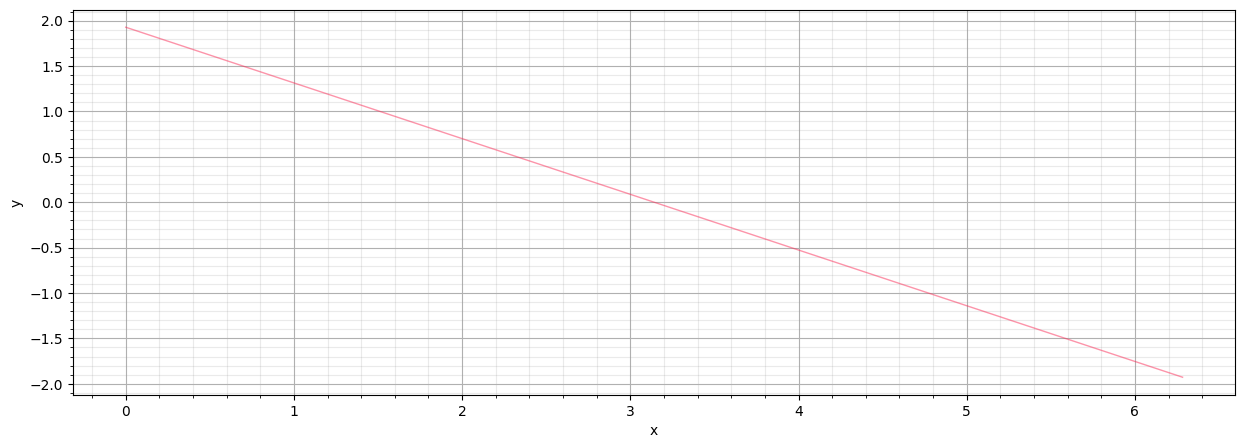

In [4]:
x = np.linspace(0, 2*PI, 100)

fig, ax = plt.subplots(figsize=(15,5))

ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(x, Taylor(sine_derivative, 1, PI)(x), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1)#, label = f'Pendel {i}')

# ax.legend()
# ax.legend(loc="upper right")

plt.show()

In [5]:
%%capture_video --path "animations/taylor/taylor.mp4"
%%manim -qm --fps 60 $video_scene

class taylor_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Taylor-Headline
        text_taylor = Tex(r"Taylorreihe $Tf(x; a) = \sum\frac{f^{(n)}}{n!}(x-a)^n$:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(RIGHT)
        text_taylor_formula = Tex(r"$\mathrm{sin}(x)\approx T\mathrm{sin}(x; a)$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(RIGHT).next_to(text_taylor)
        text_taylor_formula_sine = Tex(r"$\mathrm{sin}(x)\approx T\mathrm{sin}(x; a)$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(4*RIGHT)

        


        # Coordinate System
        origin = [-1.5, -0.5, 0]

        x_range = [-0.5, 3.75*PI, 1]
        y_range = [-2.25, 2.25, 1]

        x_length = 8
        y_length = 5.5

        x_dict = dict(zip([4, 8], [r"$\pi$", r"$2\pi$"]))

        npla = NumberPlane(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin)
        ax = Axes(x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, axis_config = {"stroke_width": 1, "stroke_opacity": 0.75}).move_to(origin).add_coordinates(x_dict)

        ax_xlabel = ax.get_x_axis_label(Tex(r"x", font_size = 36)).shift(0.25*DOWN + 0.125*RIGHT)
        ax_ylabel = ax.get_y_axis_label(Tex(r"y", font_size = 36)).shift(0.8125*LEFT + 0.5*DOWN)

        coordinate_system = VGroup(npla, ax, ax_xlabel, ax_ylabel)

        a_factor = PI/4
        sine = ax.plot(lambda x: np.sin(x*a_factor), color = WHITE, stroke_width = 1.5, x_range = [0, 3.5*PI])
        e = ax.plot(lambda x: np.exp(x) / 100, color = WHITE, stroke_width = 1.5, x_range = [0, 3.5*PI])

        # taylor_sine_1 = ax.plot(Taylor(sine_derivative, 1, 4), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = find_xlim(Taylor(sine_derivative, 1, 4), 2, [0, 3.5*PI]))
        taylor_sine_1 = ax.plot(Taylor(sine_derivative, 1, 4), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = find_xlim_minus(Taylor(sine_derivative, 1, 4), 2, [0, 3.5*PI]))
        taylor_sine_3 = ax.plot(Taylor(sine_derivative, 3, 4), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = find_xlim_plus(Taylor(sine_derivative, 3, 4), 2, [0, 3.5*PI]))
        taylor_sine_5 = ax.plot(Taylor(sine_derivative, 5, 4), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = find_xlim_minus(Taylor(sine_derivative, 5, 4), 2, [0, 3.5*PI]))
        taylor_sine_7 = ax.plot(Taylor(sine_derivative, 7, 4), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = find_xlim_plus(Taylor(sine_derivative, 7, 4), 2, [0, 3.5*PI]))#, y_range = [-2, 2])

        taylor_e_1 = ax.plot(Taylor(e_derivative, 1, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_2 = ax.plot(Taylor(e_derivative, 2, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_3 = ax.plot(Taylor(e_derivative, 3, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_4 = ax.plot(Taylor(e_derivative, 4, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_5 = ax.plot(Taylor(e_derivative, 5, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_6 = ax.plot(Taylor(e_derivative, 6, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])
        taylor_e_7 = ax.plot(Taylor(e_derivative, 7, PI), color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [0, 3.5*PI])


        self.play(Write(text_taylor), run_time = 3)
        self.wait(0.5)
        self.play(FadeIn(coordinate_system), run_time = 3)
        self.wait(0.5)
        self.play(Create(sine), run_time = 3)
        self.wait(1.5)
        self.play(Create(taylor_sine_1), run_time = 2)
        self.wait(1)
        self.play(Transform(taylor_sine_1, taylor_sine_3), run_time = 2)
        self.wait(1)
        self.play(Transform(taylor_sine_1, taylor_sine_5), run_time = 2)
        self.wait(1)
        self.play(Transform(taylor_sine_1, taylor_sine_7), run_time = 2)
        self.wait(1)

        # self.add(coordinate_system, e)
        # self.play(Create(taylor_e_1), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_2), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_3), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_4), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_5), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_6), run_time = 2)
        # self.wait(1)
        # self.play(Transform(taylor_e_1, taylor_e_7), run_time = 2)
        # self.wait(1)

Output saved by overwring previous file at animations/taylor/taylor.mp4.
